In [1]:
from fastai.vision.all import *

In [2]:
path = Path("../data/ESD/")

In [3]:
def grandparent_label(path):
    return Path(path).parent.parent.name

def _parent_idxs(files, name):
    return L([i for i, path in enumerate(files) if parent_label(path) == name])

def ParentSplitter(train_name='train', valid_name='valid'):
    def _inner(o):
        return _parent_idxs(o, train_name), _parent_idxs(o, valid_name)
    return _inner

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=ParentSplitter(valid_name="test"),
    get_y=grandparent_label,
    item_tfms=[Resize((128, 192), method="squish")]
).dataloaders(path, bs=32)

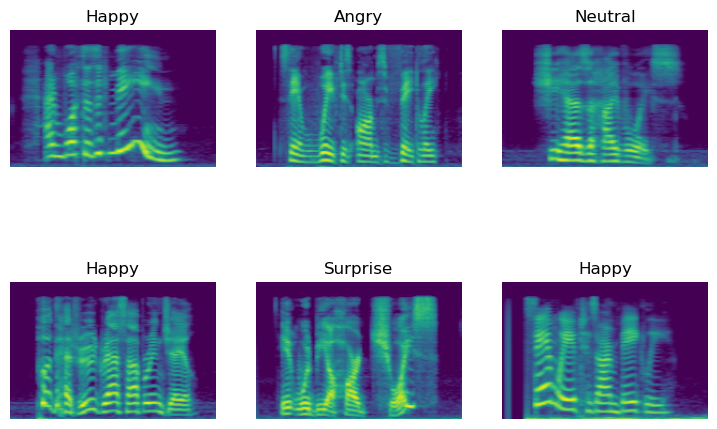

In [11]:
dls.show_batch(max_n=6)

In [12]:
learn = vision_learner(dls, resnet34, metrics=accuracy)

/Users/tk541/mambaforge/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/tk541/mambaforge/envs/torch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0010000000474974513)

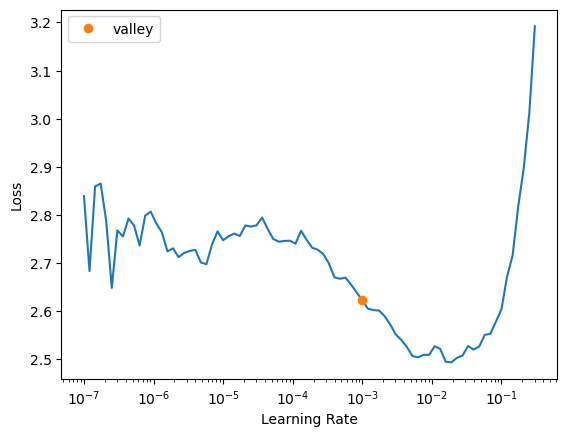

In [13]:
learn.lr_find()

In [14]:
learn.fine_tune(3, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.529758,1.188351,0.536000,01:16


epoch,train_loss,valid_loss,accuracy,time
0,0.781479,0.738521,0.724000,01:56
1,0.420772,0.494082,0.830000,01:55
2,0.161152,0.475423,0.841333,01:55


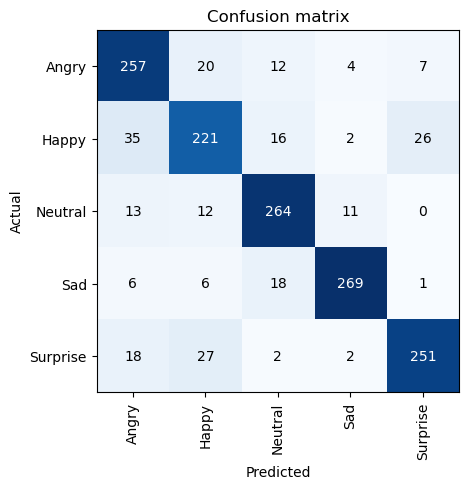

In [15]:
interep = ClassificationInterpretation.from_learner(learn)
interep.plot_confusion_matrix()